In [64]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [65]:
X = matplotlib.image.imread("data/IMG_1878.JPG")
X.shape

(1024, 768, 3)

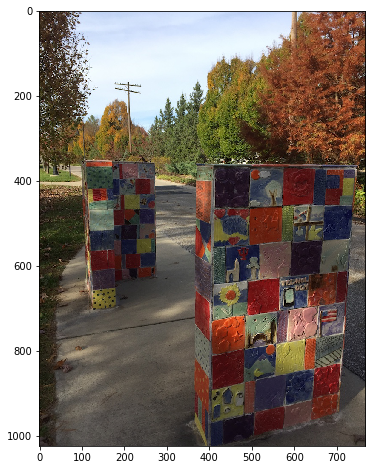

In [66]:
plt.figure(figsize=(8,8))
plt.imshow(X)
plt.show()

In [67]:
Xr, Xg, Xb = X[:,:,0], X[:,:,1], X[:,:,2]

In [68]:
for i in range(3):
    for j in range(3):
        random_choice = np.random.choice(X.shape[0]-8)
        if i == 0 and j == 0:
            R = X[random_choice:random_choice+8,:,i]
        else:
            R = np.concatenate((R, X[random_choice:random_choice+8,:,i]), axis=1)
print(R.shape)

(8, 6912)


# Power iteration

In [69]:
def power_iteration(A):
    """
    Ideally choose a random vector to decrease the chance that our vector is orthogonal to eigen vector
    """
    b_k = np.random.rand(A.shape[0])
    num_simulations = 10000
    for _ in range(num_simulations):
        # calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)
        # calculate its norm
        b_k1_norm = np.linalg.norm(b_k1)
        # renormalize the vector
        b_k = b_k1/b_k1_norm
    
    # rayleigh quotient in order to get the associated eigen value
    rayleigh_quotient = np.dot(b_k.T, np.dot(A, b_k))/np.dot(b_k.T,b_k)
    
    return np.reshape(b_k, (b_k.shape[0],1)), rayleigh_quotient

In [70]:
eigen_vectors = np.empty(shape = (8,8))
eigen_values = []
cov_R = np.cov(R)
cov_R_residue = cov_R
for i in range(8):
    eigen_vector,  eigen_value = power_iteration(cov_R_residue)
    eigen_vectors[i, :] = eigen_vector.reshape((8))
    eigen_values.append(eigen_value)
#     print(eigen_value)
#     print(eigen_vector.T)
    cov_R_residue = cov_R_residue - eigen_value * np.dot(eigen_vector, eigen_vector.T)

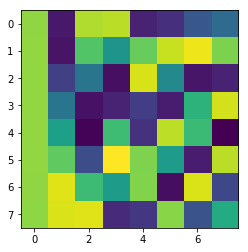

In [71]:
plt.imshow(eigen_vectors.T)
plt.show()

In [72]:
for i in range(3):
    for j in range(30):
        random_choice = np.random.choice(X.shape[0]-8)
        if i == 0 and j == 0:
            R = X[random_choice:random_choice+8,:,i]
        else:
            R = np.concatenate((R, X[random_choice:random_choice+8,:,i]), axis=1)
print(R.shape)

eigen_vectors = np.empty(shape = (8,8))
eigen_values = []
cov_R = np.cov(R)
cov_R.shape
cov_R_residue = cov_R
for i in range(8):
    eigen_vector,  eigen_value = power_iteration(cov_R_residue)
    eigen_vectors[i, :] = eigen_vector.reshape((8))
    eigen_values.append(eigen_value)
#     print(eigen_value)
#     print(eigen_vector.T)
    cov_R_residue = cov_R_residue - eigen_value * np.dot(eigen_vector, eigen_vector.T)

(8, 69120)


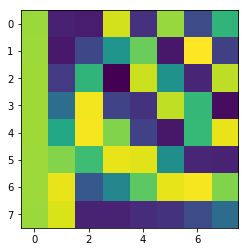

In [73]:
plt.imshow(eigen_vectors.T)
plt.show()